# **1. Perkenalan Dataset**


Dataset Laptop Price berisi informasi spesifikasi dan harga berbagai model laptop dari sejumlah produsen. Setiap baris merepresentasikan satu perangkat dengan detail teknis, sistem operasi, serta harga dalam euro. Dataset ini terdiri dari 1.303 baris dan 13 kolom, sehingga cukup komprehensif untuk analisis harga perangkat keras maupun pemodelan prediktif.

| Kolom                | Deskripsi                                                                    |
| -------------------- | ---------------------------------------------------------------------------- |
| **laptop_ID**        | Identitas unik untuk setiap laptop.                                          |
| **Company**          | Produsen laptop, misalnya Apple, HP, Acer, Dell, dan lainnya.                |
| **Product**          | Nama atau seri model laptop.                                                 |
| **TypeName**         | Kategori laptop seperti *Ultrabook*, *Notebook*, *Gaming*, dll.              |
| **Inches**           | Ukuran layar dalam satuan inci.                                              |
| **ScreenResolution** | Resolusi layar lengkap beserta jenis panel jika tersedia.                    |
| **Cpu**              | Tipe prosesor dan kecepatan clock.                                           |
| **Ram**              | Kapasitas RAM dalam format seperti “8GB” atau “16GB”.                        |
| **Memory**           | Jenis dan kapasitas penyimpanan, mencakup SSD, HDD, atau kombinasi keduanya. |
| **Gpu**              | Jenis kartu grafis yang digunakan, baik integrated maupun dedicated.         |
| **OpSys**            | Sistem operasi yang digunakan.                                               |
| **Weight**           | Berat perangkat dalam satuan kilogram.                                       |
| **Price_euros**      | Harga laptop dalam euro, sebagai variabel target.                            |


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# import library yang dibutuhkan
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8,5)

# **3. Memuat Dataset**

In [2]:
# load data
DATA_PATH = "/content/laptop_price.csv"
if not os.path.exists(DATA_PATH):
  raise FileNotFoundError(f"Dataset tidak ditemukan di {DATA_PATH}")

# coba beberapa encoding
try:
  df = pd.read_csv(DATA_PATH, encoding='utf-8', low_memory=False)
except Exception:
  df = pd.read_csv(DATA_PATH, encoding='latin-1', low_memory=False)
print("Dataset dimuat. Bentuk:", df.shape)
df.head()

Dataset dimuat. Bentuk: (1303, 13)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# info & deskriptif
print("Kolom:", df.columns.tolist())
display(df.describe(include='all').transpose())
display(df.info())

Kolom: ['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,NaN,NaN,NaN,660.155794,381.172104,1.0,331.5,659.0,990.5,1320.0
Company,1303,19,Dell,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1303,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1303,6,Notebook,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1303.0,NaN,NaN,NaN,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4
ScreenResolution,1303,40,Full HD 1920x1080,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,1303,9,8GB,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,1303,39,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,1303,110,Intel HD Graphics 620,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


None

In [4]:
# missing & duplicates
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing>0].to_frame("missing_count"))
print("Jumlah duplikat baris:", df.duplicated().sum())

,missing_count


Jumlah duplikat baris: 0


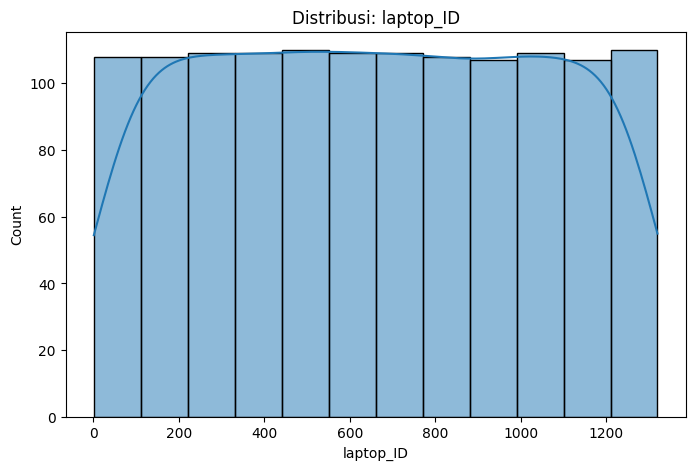

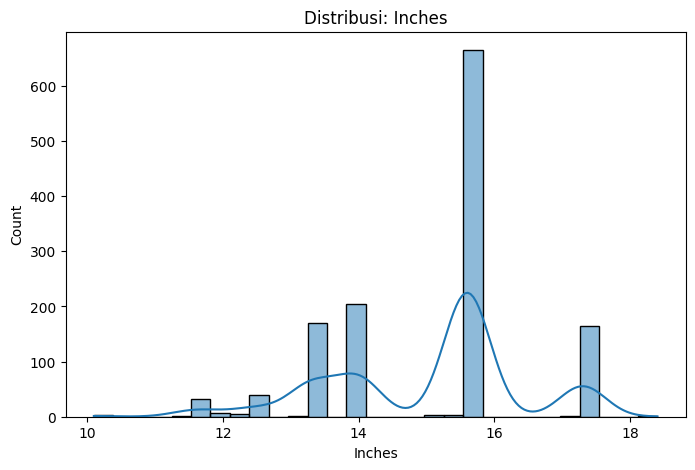

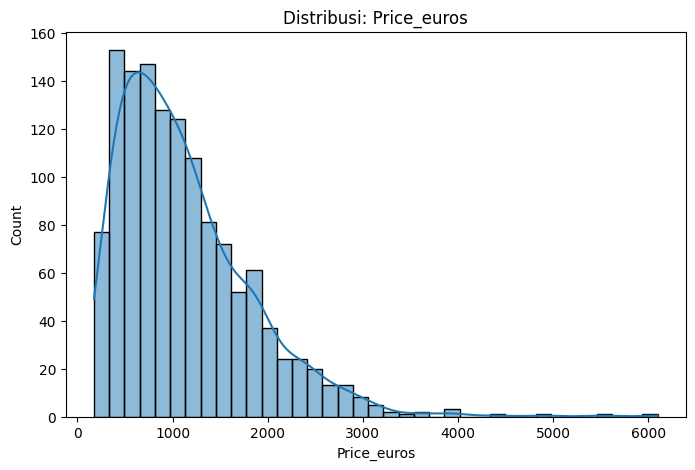

In [5]:
# distribusi numerik
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical:
  plt.figure()
  sns.histplot(df[col].dropna(), kde=True)
  plt.title(f'Distribusi: {col}')

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


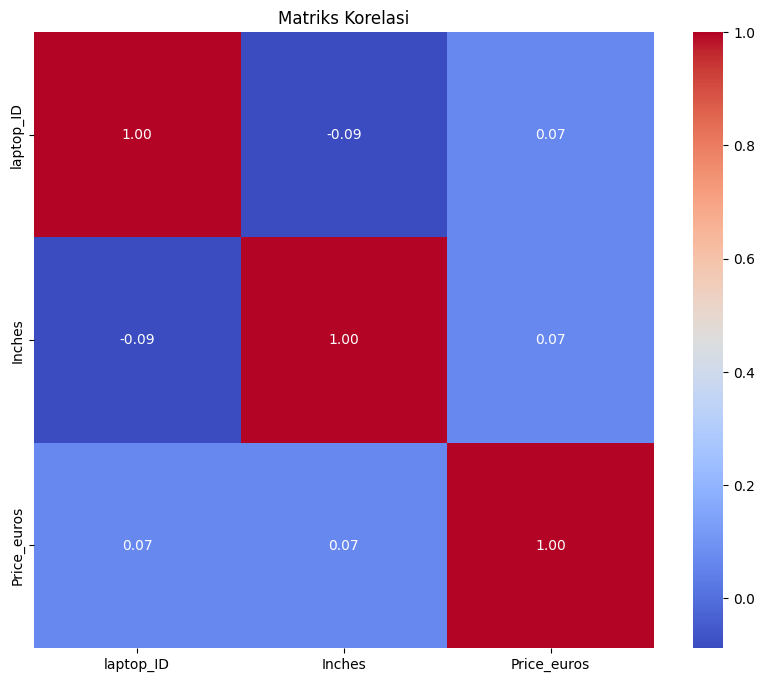

In [6]:
# Cell 6: korelasi
if len(numerical) >= 2:
  corr = df[numerical].corr()
  plt.figure(figsize=(10,8))
  sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
  plt.title("Matriks Korelasi")
  display(corr)
else:
  print("Tidak cukup fitur numerik untuk korelasi.")

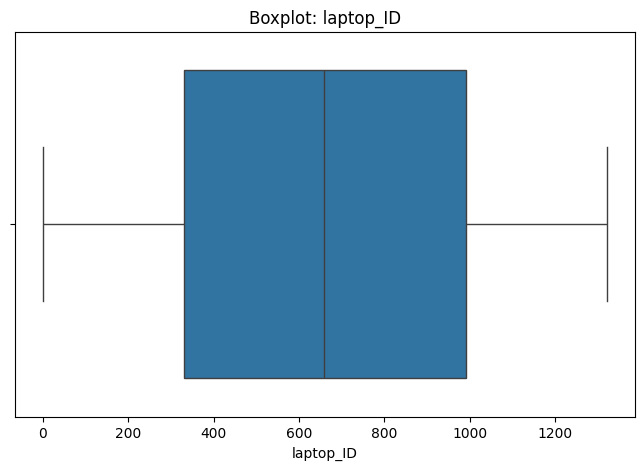

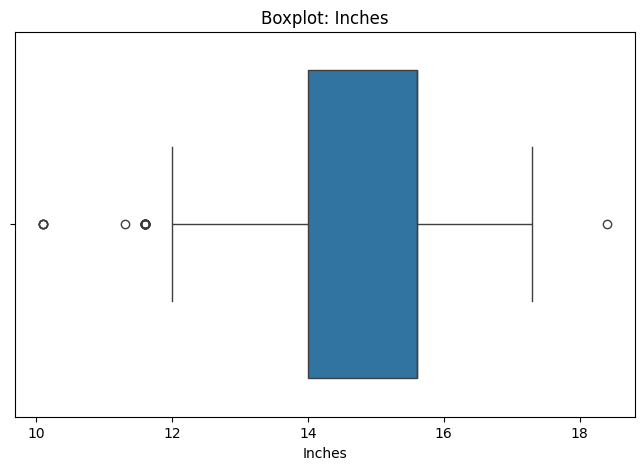

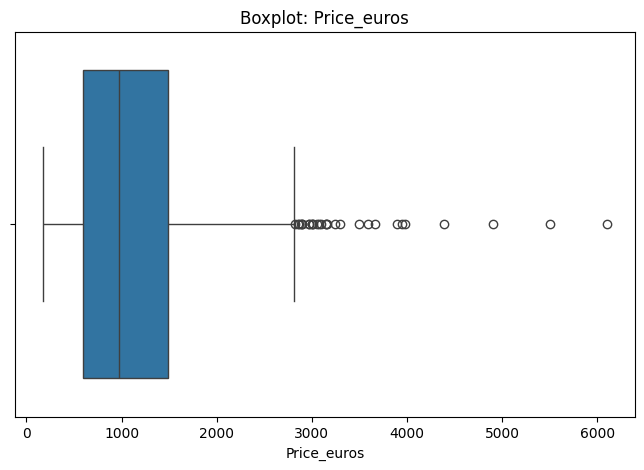

In [7]:
# boxplot
for col in numerical:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot: {col}')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# preprocessing eksperimen
df_p = df.copy()

# imputasi numerik => median
for col in df_p.select_dtypes(include=[np.number]).columns:
  df_p[col].fillna(df_p[col].median(), inplace=True)

# imputasi kategori => 'unknown'
for col in df_p.select_dtypes(exclude=[np.number]).columns:
  df_p[col].fillna("unknown", inplace=True)

# encoding sederhana
le = LabelEncoder()
for col in df_p.select_dtypes(include=['object']).columns:
  if df_p[col].nunique() <= 20:
    df_p[col] = le.fit_transform(df_p[col].astype(str))
else:
  freq = df_p[col].value_counts() / len(df_p)
  df_p[col] = df_p[col].map(freq).fillna(0)

# hapus duplikasi
df_p.drop_duplicates(inplace=True)
print("Preprocessing eksperimen selesai. Bentuk:", df_p.shape)
df_p.head()

Preprocessing eksperimen selesai. Bentuk: (1303, 13)


/tmp/ipython-input-3185314909.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_p[col].fillna(df_p[col].median(), inplace=True)
/tmp/ipython-input-3185314909.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,MacBook Pro,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,8,0.009977,1339.69
1,2,1,Macbook Air,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,8,0.004605,898.94
2,3,7,250 G6,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,4,0.019186,575.00
3,4,1,MacBook Pro,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,1,512GB SSD,AMD Radeon Pro 455,8,0.003070,2537.45
4,5,1,MacBook Pro,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,8,0.009977,1803.60


In [9]:
# split & simpan
TARGET = 'Price_euros'
if TARGET not in df_p.columns:
  raise ValueError(f"Kolom target '{TARGET}' tidak ditemukan dalam data preprocessing")

X = df_p.drop(columns=[TARGET])
y = df_p[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

os.makedirs("/content/laptop_price", exist_ok=True)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
train.to_csv("/content/laptop_price/laptop_price_train.csv", index=False)
test.to_csv("/content/laptop_price/laptop_price_test.csv", index=False)
print("Hasil preprocessing tersimpan")

Hasil preprocessing tersimpan
